# SEMENTIC SEGMENTATION MODELS USING TORCHVISION

---



## Libraries

---



In [ ]:
from torchvision import models
from PIL import Image
import torch
import numpy as np
import torchvision.transforms as T
import cv2
import matplotlib.pyplot as plt

## Load The Models

---



In [ ]:
fcn_resnet50 = models.segmentation.fcn_resnet50(pretrained=True).eval()
fcn_resnet101 = models.segmentation.fcn_resnet101(pretrained=True).eval()
deeplabv3_resnet50 = models.segmentation.deeplabv3_resnet50(pretrained=True).eval()
deeplabv3_resnet101 = models.segmentation.deeplabv3_resnet101(pretrained=True).eval()
deeplabv3_mobilenet_v3_large = models.segmentation.deeplabv3_mobilenet_v3_large(pretrained=True).eval()
lraspp_mobilenet_v3_large = models.segmentation.lraspp_mobilenet_v3_large(pretrained=True).eval()


## Define The Helper Function

---



In [ ]:
# Define the helper function
def decode_segmap(img, nc=21):
  
  label_colors = np.array([(0, 0, 0),  # 0=background
               # 1=aeroplane, 2=bicycle, 3=bird, 4=boat, 5=bottle
               (128, 0, 0), (0, 128, 0), (128, 128, 0), (0, 0, 128), (128, 0, 128),
               # 6=bus, 7=car, 8=cat, 9=chair, 10=cow
               (0, 128, 128), (128, 128, 128), (64, 0, 0), (192, 0, 0), (64, 128, 0),
               # 11=dining table, 12=dog, 13=horse, 14=motorbike, 15=person
               (192, 128, 0), (64, 0, 128), (192, 0, 128), (64, 128, 128), (192, 128, 128),
               # 16=potted plant, 17=sheep, 18=sofa, 19=train, 20=tv/monitor
               (0, 64, 0), (128, 64, 0), (0, 192, 0), (128, 192, 0), (0, 64, 128)])

  r = np.zeros_like(img).astype(np.uint8)
  g = np.zeros_like(img).astype(np.uint8)
  b = np.zeros_like(img).astype(np.uint8)
  
  for l in range(0, nc):
    idx = img == l
    r[idx] = label_colors[l, 0]
    g[idx] = label_colors[l, 1]
    b[idx] = label_colors[l, 2]
    
  rgb = np.stack([r, g, b], axis=2)
  return rgb

## Segment Image Function

---



In [ ]:
def segment(model, path, show_orig=True, device =  torch.device('cuda' if torch.cuda.is_available() else 'cpu')):

  img = Image.open(path)
  if show_orig: plt.imshow(img); plt.axis('off'); plt.show()
  # Comment the Resize and CenterCrop for better inference results
  trf = T.Compose([T.Resize(640), 
                   #T.CenterCrop(224), 
                   T.ToTensor(), 
                   T.Normalize(mean = [0.485, 0.456, 0.406], 
                               std = [0.229, 0.224, 0.225])])
  inp = trf(img).unsqueeze(0).to(device)
  out = model.to(device)(inp)['out']
  om = torch.argmax(out.squeeze(), dim=0).detach().cpu().numpy()
  rgb = decode_segmap(om)
  plt.imshow(rgb); plt.axis('off'); plt.show()

## Segmentation to Multiple Objects

---



2022-11-30 14:47:22 URL:https://upload.wikimedia.org/wikipedia/commons/5/5d/401_Gridlock.jpg [324724/324724] -> "cars.jpg" [1]


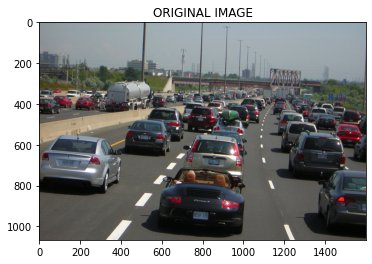

Segmenatation Image on fCN_RESNET50


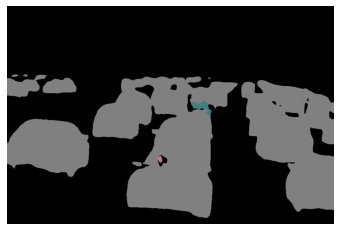

Segmenatation Image on fCN_RESNET101


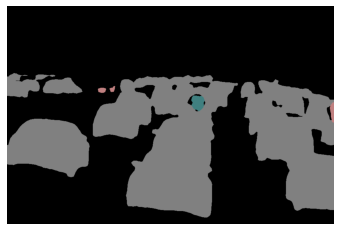

Segmenatation Image on DEEPLABV3_RESNET50


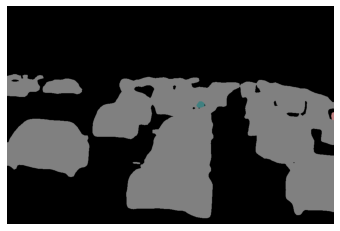

Segmenatation Image on DEEPLABV3_RESNET101


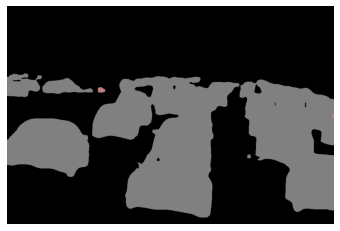

Segmenatation Image on Deeplabv3 Mobilenet V3 Large


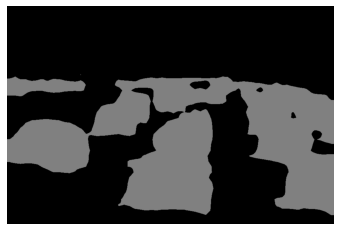

Segmenatation Image on Lraspp Mobilenet V3 Large


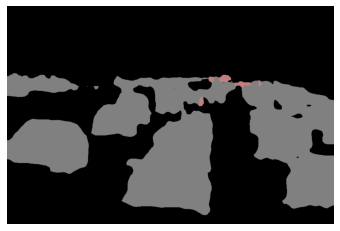

In [ ]:
!wget -nv "https://upload.wikimedia.org/wikipedia/commons/5/5d/401_Gridlock.jpg" -O cars.jpg

img = Image.open('./cars.jpg')
plt.imshow(img); plt.title("ORIGINAL IMAGE"); plt.show()

print ('Segmenatation Image on fCN_RESNET50')
segment(fcn_resnet50, path='./cars.jpg', show_orig=False)

print ('Segmenatation Image on fCN_RESNET101')
segment(fcn_resnet101, path='./cars.jpg', show_orig=False)

print ('Segmenatation Image on DEEPLABV3_RESNET50')
segment(deeplabv3_resnet50, path='./cars.jpg', show_orig=False)

print ('Segmenatation Image on DEEPLABV3_RESNET101')
segment(deeplabv3_resnet101, path='./cars.jpg', show_orig=False)

print ('Segmenatation Image on Deeplabv3 Mobilenet V3 Large')
segment(deeplabv3_mobilenet_v3_large, path='./cars.jpg', show_orig=False)

print ('Segmenatation Image on Lraspp Mobilenet V3 Large')
segment(lraspp_mobilenet_v3_large, path='./cars.jpg', show_orig=False)

2022-11-30 14:56:08 URL:https://upload.wikimedia.org/wikipedia/commons/4/49/People_walking_at_Manasquan.jpg [10511384/10511384] -> "people_and_dog.jpg" [1]


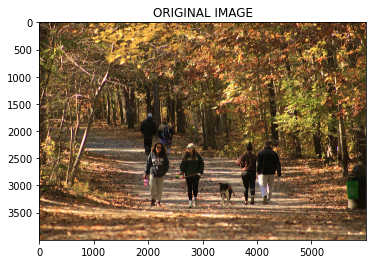

Segmenatation Image on fCN_RESNET50


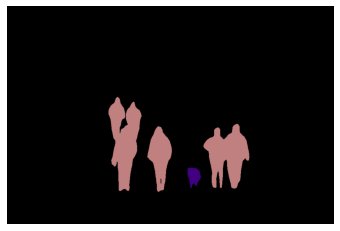

Segmenatation Image on fCN_RESNET101


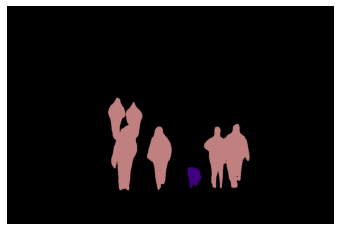

Segmenatation Image on DEEPLABV3_RESNET50


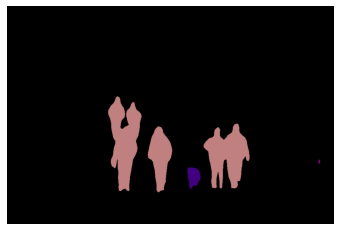

Segmenatation Image on DEEPLABV3_RESNET101


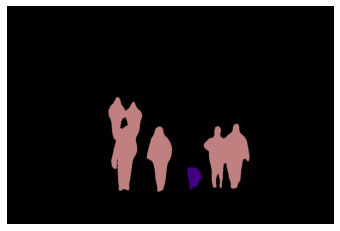

Segmenatation Image on Deeplabv3 Mobilenet V3 Large


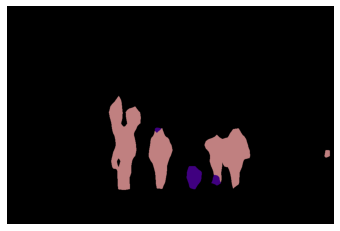

Segmenatation Image on Lraspp Mobilenet V3 Large


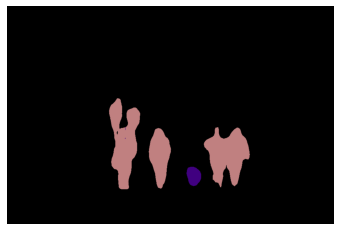

In [ ]:
!wget -nv "https://upload.wikimedia.org/wikipedia/commons/4/49/People_walking_at_Manasquan.jpg" -O people_and_dog.jpg

img = Image.open('./people_and_dog.jpg')
plt.imshow(img); plt.title("ORIGINAL IMAGE"); plt.show()


print ('Segmenatation Image on fCN_RESNET50')
segment(fcn_resnet50, path='./people_and_dog.jpg', show_orig=False)

print ('Segmenatation Image on fCN_RESNET101')
segment(fcn_resnet101, path='./people_and_dog.jpg', show_orig=False)


print ('Segmenatation Image on DEEPLABV3_RESNET50')
segment(deeplabv3_resnet50, path='./people_and_dog.jpg', show_orig=False)

print ('Segmenatation Image on DEEPLABV3_RESNET101')
segment(deeplabv3_resnet101, path='./people_and_dog.jpg', show_orig=False)


print ('Segmenatation Image on Deeplabv3 Mobilenet V3 Large')
segment(deeplabv3_mobilenet_v3_large, path='./people_and_dog.jpg', show_orig=False)

print ('Segmenatation Image on Lraspp Mobilenet V3 Large')
segment(lraspp_mobilenet_v3_large, path='./people_and_dog.jpg', show_orig=False)


## ***Conclusion***

- I carried out semantic segmentation inference using Fcn , DeepLabV3 with Resnet50 and Resnet101 backbone and using DeepLabV3 and Lite R-ASPP with MobileNetV3 backbone.
- Each of sementic segmentation models has its own unique properties and is successful in its on segmentatation image. But There are a few model differences that be noticed with bare eyes such as captured it nicely or not on image. 
- **Note** : You can play around with a few more images to see how these models perform in different scenarios.

## ***References***
- [PyTorch-Segmentation-torchvision](https://github.com/spmallick/learnopencv/tree/master/PyTorch-Segmentation-torchvision)

- [PyTorch-Vision-References-Segmentation](https://github.com/pytorch/vision/tree/main/references/segmentation#deeplabv3_resnet50)